In [1]:
%pip install pandas matplotlib scikit-learn umap-learn openpyxl


  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.5-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached umap_learn-0.5.9.post2-py3-none-any.whl.metadata (25 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached numpy-2.3.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/111.1 kB ? eta -:--:--
     ------------- ----------------------- 41.0/111.1 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 111.1/111.1 kB 1.6 MB/s eta 0:00:00
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metad


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns

print("ライブラリのインポートが完了しました。")

ライブラリのインポートが完了しました。


In [5]:
# データ数を設定
num_samples = 200
num_features = 22

# 22次元のランダムデータを生成
np.random.seed(42)
features = np.random.rand(num_samples, num_features)

# 4種類のラベルを生成 ('Label_A', 'Label_B', 'Label_C', 'Label_D')
labels = [f"Label_{chr(65 + i)}" for i in np.random.randint(0, 4, num_samples)]

# DataFrameを作成
df = pd.DataFrame(features, columns=[f'feature_{i+1}' for i in range(num_features)])
df['label'] = labels

# Excelファイルとして保存
file_name = 'sample_data.xlsx'
df.to_excel(file_name, index=False)

print(f"'{file_name}' を作成しました。")
df.head()

'sample_data.xlsx' を作成しました。


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,label
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,Label_B
1,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.607545,0.170524,...,0.808397,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,0.034389,0.909320,Label_B
2,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,...,0.195983,0.045227,0.325330,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,Label_D
3,0.140924,0.802197,0.074551,0.986887,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,...,0.115869,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,Label_B
4,0.887213,0.472215,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,...,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,Label_A


In [6]:
# 読み込むExcelファイル名
# ご自身のファイルを使用する場合は、下の行を書き換えてください
# 例: file_name = 'my_actual_data.xlsx'
file_name = "E:/Je respire/解析/1. 脳血流と問題カテゴリの関連.xlsx"

# ExcelファイルをDataFrameに読み込む
try:
    df = pd.read_excel(file_name, sheet_name='ディアビアイ')
    print(f"'{file_name}' を正常に読み込みました。")
    print("データフレームの最初の5行:")
    print(df.head())
except FileNotFoundError:
    print(f"エラー: '{file_name}' が見つかりません。セル2を実行するか、ファイル名を確認してください。")

'E:/Je respire/解析/1. 脳血流と問題カテゴリの関連.xlsx' を正常に読み込みました。
データフレームの最初の5行:
   subject  question  q_category  score  left_pupil_std  right_pupil_std  \
0        1        15           3      2        0.198059        -0.004101   
1        1         1           1      2        0.269850         0.237645   
2        1        11           2      1        0.747078         0.743156   
3        1         4           1      2       -0.047677        -0.082496   
4        1        18           3      0        0.185023         0.105690   

    CH1_std   CH2_std   CH3_std   CH4_std  ...  Sensor-E:SC/GSR_std  \
0 -0.023247  0.063408 -0.052554 -0.538870  ...                  NaN   
1  0.074821  0.562988 -0.036988 -0.567791  ...                  NaN   
2 -0.042180  0.689511 -0.107446  0.053479  ...                  NaN   
3  0.014693 -0.313235  0.032525  0.923615  ...                  NaN   
4 -0.005959 -0.735926  0.043048  0.346212  ...                  NaN   

   Sensor-G:BVP_std  [G] BVP Amp._std  [G] Hear

In [19]:
# ラベル列の名前を指定
# ご自身のデータのラベル列名に合わせて書き換えてください
# label_column = 'q_category'

# 特徴量 (X) と ラベル (y) にデータを分割
# X = df.drop(label_column, axis=1)
# X = df.iloc[:, 6:28] # 脳血流
# X = df.iloc[:, 4:6] # 瞳孔径
X = df.iloc[24:, 72:80] # 皮膚脈
y = df.iloc[24:, 2]

# データ形状の確認
print(f"特徴量 (X) の形状: {X.shape}")
print(f"ラベル (y) の形状: {y.shape}")

特徴量 (X) の形状: (216, 8)
ラベル (y) の形状: (216,)


In [20]:
X

,Sensor-E:SC/GSR_std,Sensor-G:BVP_std,[G] BVP Amp._std,[G] Heart Rate_std,[G] HRV Amp._std,"[G] HRV-LF Power (0,04-0,16 Hz)_std","[G] HRV-HF Power (0,16-0,4 Hz)_std",[G] HRV-LF / HRV-HF _std
24,-2.316218,-0.416714,-1.080845,-0.430259,-0.532596,0.034739,0.033055,-0.043068
25,-1.869950,-0.387921,-1.088408,0.401437,-0.103162,0.141960,-0.081545,0.122704
26,-1.392743,-0.300311,-0.880129,0.425088,-0.296698,-0.036748,0.060625,-0.102001
27,-1.328248,-0.055033,-0.211959,-0.361976,-0.419823,0.069671,0.000761,0.026549
28,-1.469291,-0.138456,-0.552340,-0.917205,-0.425973,0.176413,-0.140497,0.264381
...,...,...,...,...,...,...,...,...
235,-0.146907,-0.161798,-0.787528,0.455222,-0.021024,-0.056533,0.011586,-0.060608
236,0.148626,-0.014604,0.150515,0.581969,-0.369529,0.339592,-0.412080,0.597972
237,0.192753,0.028072,0.470190,0.223280,-0.691516,0.641772,-0.636427,0.630937
238,0.562635,0.083967,0.031785,-0.227338,-0.113027,0.011279,0.025022,-0.025902


c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRA

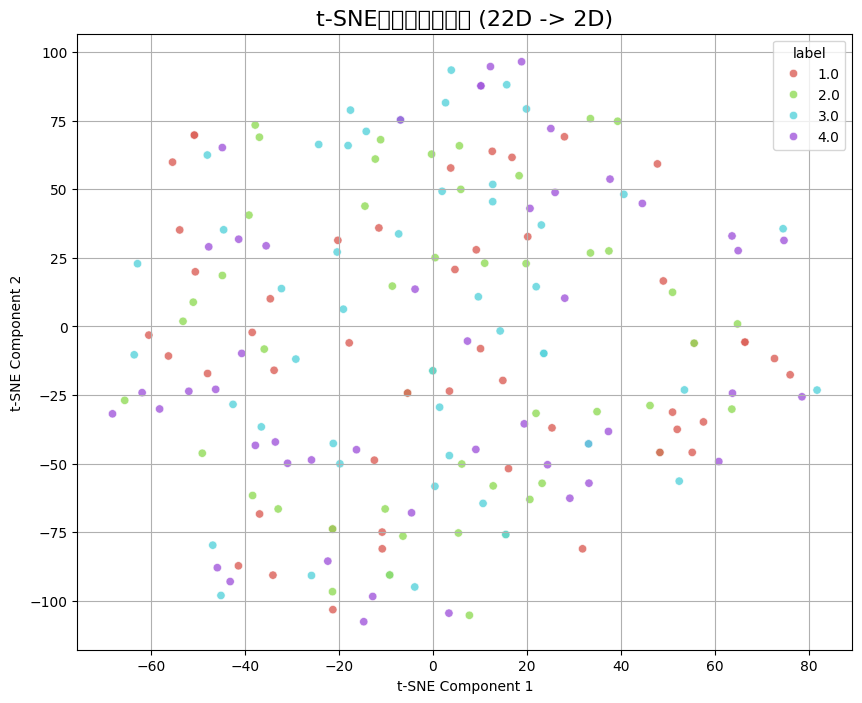

In [22]:
# t-SNEモデルの初期化
# perplexityはデータ数に応じて調整することが多い (5~50が一般的)
tsne = TSNE(n_components=2, perplexity=15, random_state=42)

# 次元削減の実行
X_tsne = tsne.fit_transform(X)

# 結果をDataFrameに格納
df_tsne = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
df_tsne['label'] = y

# 可視化
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='label',
    palette=sns.color_palette("hls", n_colors=y.nunique()),
    data=df_tsne,
    legend="full",
    alpha=0.8
)
plt.title('t-SNEによる次元削減 (22D -> 2D)', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\共同研究\松島さん\jerespire_env2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sa

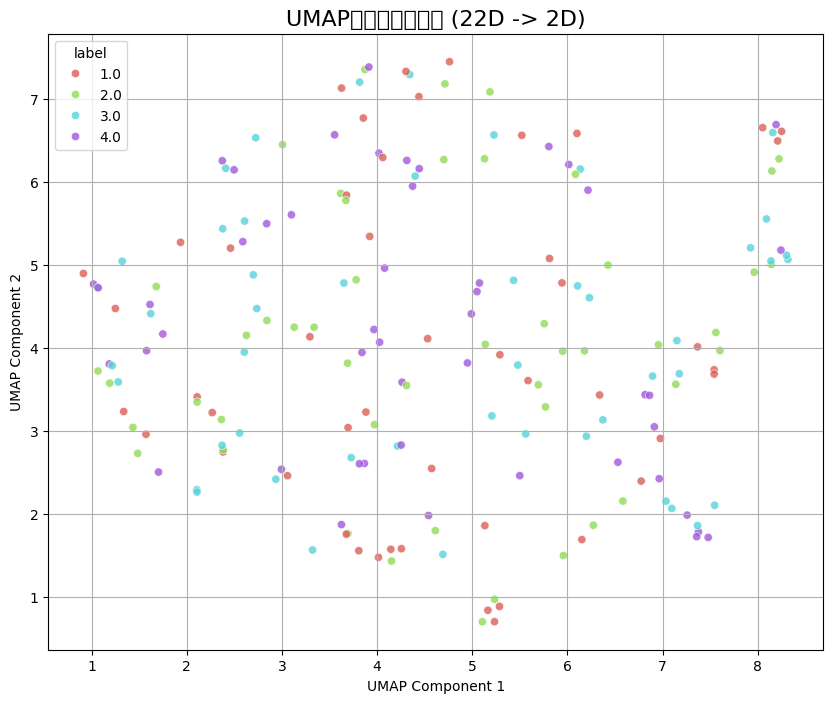

In [25]:
# UMAPモデルの初期化
# n_neighborsやmin_distを調整することで結果が変わります
reducer = umap.UMAP(n_neighbors=10, min_dist=0.2, n_components=2, random_state=42)

# 次元削減の実行
X_umap = reducer.fit_transform(X)

# 結果をDataFrameに格納
df_umap = pd.DataFrame(X_umap, columns=['umap_1', 'umap_2'])
df_umap['label'] = y

# 可視化
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='umap_1', y='umap_2',
    hue='label',
    palette=sns.color_palette("hls", n_colors=y.nunique()),
    data=df_umap,
    legend="full",
    alpha=0.8
)
plt.title('UMAPによる次元削減 (22D -> 2D)', fontsize=16)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()